<h1>Regularized Logistic Regression</h1>

Importing Libraries

In [137]:
import matplotlib.pyplot as plt
import numpy as np

Creating the Data Nomalization Function

In [138]:
def data_normalization (dataset):
    columns_mean = []
    columns_std = []

    dataset = np.transpose(dataset)
        
    for i in range(len(dataset)-1):
        columns_std.append(np.std(dataset[i]))
        columns_mean.append(np.mean(dataset[i]))

        dataset[i] = dataset[i] - columns_mean[i]
        dataset[i] = dataset[i] * (1/columns_std[i])
        
    dataset = np.transpose(dataset)
    
    return dataset, columns_mean, columns_std

Entering and formating the Data

In [139]:
dataset_grades_acceptance = [[0.051267,0.69956,1],
[-0.092742,0.68494,1],
[-0.21371,0.69225,1],
[-0.375,0.50219,1],
[-0.51325,0.46564,1],
[-0.52477,0.2098,1],
[-0.39804,0.034357,1],
[-0.30588,-0.19225,1],
[0.016705,-0.40424,1],
[0.13191,-0.51389,1],
[0.38537,-0.56506,1],
[0.52938,-0.5212,1],
[0.63882,-0.24342,1],
[0.73675,-0.18494,1],
[0.54666,0.48757,1],
[0.322,0.5826,1],
[0.16647,0.53874,1],
[-0.046659,0.81652,1],
[-0.17339,0.69956,1],
[-0.47869,0.63377,1],
[-0.60541,0.59722,1],
[-0.62846,0.33406,1],
[-0.59389,0.005117,1],
[-0.42108,-0.27266,1],
[-0.11578,-0.39693,1],
[0.20104,-0.60161,1],
[0.46601,-0.53582,1],
[0.67339,-0.53582,1],
[-0.13882,0.54605,1],
[-0.29435,0.77997,1],
[-0.26555,0.96272,1],
[-0.16187,0.8019,1],
[-0.17339,0.64839,1],
[-0.28283,0.47295,1],
[-0.36348,0.31213,1],
[-0.30012,0.027047,1],
[-0.23675,-0.21418,1],
[-0.06394,-0.18494,1],
[0.062788,-0.16301,1],
[0.22984,-0.41155,1],
[0.2932,-0.2288,1],
[0.48329,-0.18494,1],
[0.64459,-0.14108,1],
[0.46025,0.012427,1],
[0.6273,0.15863,1],
[0.57546,0.26827,1],
[0.72523,0.44371,1],
[0.22408,0.52412,1],
[0.44297,0.67032,1],
[0.322,0.69225,1],
[0.13767,0.57529,1],
[-0.0063364,0.39985,1],
[-0.092742,0.55336,1],
[-0.20795,0.35599,1],
[-0.20795,0.17325,1],
[-0.43836,0.21711,1],
[-0.21947,-0.016813,1],
[-0.13882,-0.27266,1],
[0.18376,0.93348,0],
[0.22408,0.77997,0],
[0.29896,0.61915,0],
[0.50634,0.75804,0],
[0.61578,0.7288,0],
[0.60426,0.59722,0],
[0.76555,0.50219,0],
[0.92684,0.3633,0],
[0.82316,0.27558,0],
[0.96141,0.085526,0],
[0.93836,0.012427,0],
[0.86348,-0.082602,0],
[0.89804,-0.20687,0],
[0.85196,-0.36769,0],
[0.82892,-0.5212,0],
[0.79435,-0.55775,0],
[0.59274,-0.7405,0],
[0.51786,-0.5943,0],
[0.46601,-0.41886,0],
[0.35081,-0.57968,0],
[0.28744,-0.76974,0],
[0.085829,-0.75512,0],
[0.14919,-0.57968,0],
[-0.13306,-0.4481,0],
[-0.40956,-0.41155,0],
[-0.39228,-0.25804,0],
[-0.74366,-0.25804,0],
[-0.69758,0.041667,0],
[-0.75518,0.2902,0],
[-0.69758,0.68494,0],
[-0.4038,0.70687,0],
[-0.38076,0.91886,0],
[-0.50749,0.90424,0],
[-0.54781,0.70687,0],
[0.10311,0.77997,0],
[0.057028,0.91886,0],
[-0.10426,0.99196,0],
[-0.081221,1.1089,0],
[0.28744,1.087,0],
[0.39689,0.82383,0],
[0.63882,0.88962,0],
[0.82316,0.66301,0],
[0.67339,0.64108,0],
[1.0709,0.10015,0],
[-0.046659,-0.57968,0],
[-0.23675,-0.63816,0],
[-0.15035,-0.36769,0],
[-0.49021,-0.3019,0],
[-0.46717,-0.13377,0],
[-0.28859,-0.060673,0],
[-0.61118,-0.067982,0],
[-0.66302,-0.21418,0],
[-0.59965,-0.41886,0],
[-0.72638,-0.082602,0],
[-0.83007,0.31213,0],
[-0.72062,0.53874,0],
[-0.59389,0.49488,0],
[-0.48445,0.99927,0],
[-0.0063364,0.99927,0],
[0.63265,-0.030612,0]]


#dataset_grades_acceptance, columns_mean, columns_std = data_normalization(dataset_grades_acceptance) #Normalizing the data and recording the mean and standart deviating for each column
dataset_grades_acceptance = np.insert(dataset_grades_acceptance, 0, 1, axis = 1) #Add a column of ones to the dataset
x = dataset_grades_acceptance[0:,0:3]
y = dataset_grades_acceptance[0:,3:4]

Plotting the Data

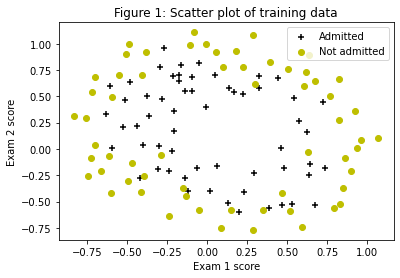

In [140]:
grade1_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 1])[0:,1:2]
grade2_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 1])[0:,2:3]

grade1_not_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 0])[0:,1:2]
grade2_not_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 0])[0:,2:3]

plt.scatter(grade1_admitted,grade2_admitted, marker = '+',color = 'black')
plt.scatter(grade1_not_admitted,grade2_not_admitted, color = 'y')
plt.legend(['Admitted','Not admitted'],loc = 1)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Figure 1: Scatter plot of training data")

plt.show()

Creating the Map Feature Function, the Sigmoid Function, the Cost Function and Linear Gradient Discent function for more than one variable

In [141]:
def map_feature (x1, x2, degree):   
    x_values = np.ones((x1.shape[0], sum(range(degree + 2))))
    current = 1
    for i in range(1, degree + 1):
        for j in range(i+1):
            x_values[:,current] = np.power(x1,i-j) * np.power(x2,j)
            current += 1

    return x_values

def computes_sigmoid_function (z):
    sigmoid_function = 1 / (1 + np.exp(-z))
    return sigmoid_function
    
def computes_cost_function (x, y, theta, lamb):
    m = len(x)

    predicted_y = computes_sigmoid_function(np.matmul(x, theta))

    regularization_param = (lamb/(2*m)) * (theta.T.dot(theta))
    cost_function = ((1/ m) * ((-y).T.dot(np.log(predicted_y)) - (1 - y).T.dot(np.log(1 - predicted_y)))) + regularization_param
    return cost_function[0][0]

def computes_linear_gradient_discent (x, y, theta, iterations, alpha, lamb):
    m = len(x)
    cost_function = []

    for _ in range(iterations):
        
        predicted_y = computes_sigmoid_function(np.matmul(x, theta))
        
        theta[0][0] = theta[0][0] - alpha * (1 / m) * np.sum(predicted_y - y)
        
        for i in range(1,len(theta)):
            #regularization_param = (lamb/m) * theta[i][0]
            theta[i][0] = theta[i][0]*(1 - alpha*(lamb/m)) - alpha * (1 / m) * x[0:,i:(1+i)].T.dot(predicted_y - y)
        cost_function.append(computes_cost_function(x, y, theta, lamb))

    return theta, cost_function

In [142]:
x = map_feature(x[:,1], x[:,2], 6)

Calculating Theta and plotting the Cost Funtion over the iterations

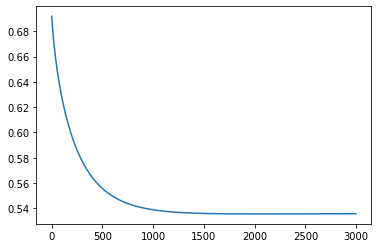

In [161]:
iterations = 3000
alpha = 0.1
theta = np.zeros((28,1))
lamb = 1

theta, cost_function = computes_linear_gradient_discent(x, y, theta, iterations, alpha, lamb)

plt.plot(cost_function)

Plotting our final prediction

C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_7212/3539451086.py:31: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p3 = plt.contour(u, v, z, levels=[0], linewidth=2, colors = 'lime')


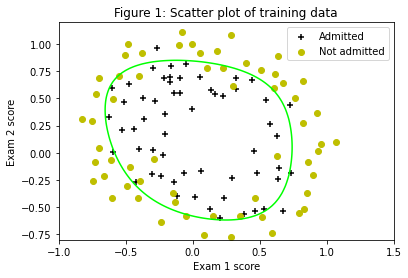

In [182]:
#Ploting ou data and our decision boundary
grade1_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 1])[0:,1:2]
grade2_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 1])[0:,2:3]

grade1_not_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 0])[0:,1:2]
grade2_not_admitted = np.array([linha for linha in dataset_grades_acceptance if linha[3] == 0])[0:,2:3]

plt.scatter(grade1_admitted,grade2_admitted, marker = '+',color = 'black')
plt.scatter(grade1_not_admitted,grade2_not_admitted, color = 'y')

plt.legend(['Admitted','Not admitted'],loc = 1)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Figure 1: Scatter plot of training data")

# Here is the grid range
u = np.linspace(-1, 1.5, 100)
v = np.linspace(-0.8, 1.2, 100)

z = np.zeros((len(u), len(v)))
# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i][j] = np.dot(map_feature(np.array([u[i]]), np.array([v[j]]), 6),theta)
z = z.T # important to transpose z before calling contour

# Plot z = 0
# Notice you need to specify the level 0
# we get collections[0] so that we can display a legend properly
p3 = plt.contour(u, v, z, levels=[0], linewidth=2, colors = 'lime')
        
# Legend, specific for the exercise
#lt.legend((p3),('y = 1', 'y = 0', 'Decision Boundary'), numpoints=1, handlelength=0)

plt.show()